# Data Science Challenge

In [ ]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [47]:
#Libraries
import pandas as pd
import numpy as np

#Visualization Libraries
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Library to split data in train and validate
from sklearn.model_selection import train_test_split

#Logistic regression since the problem is of binary classification
from sklearn.linear_model import LogisticRegression

pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [2]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [3]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [4]:
#Explore columns
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [5]:
#Description
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


In [6]:
data.shape

(2870, 12)

In [7]:
data.info

<bound method DataFrame.info of          id     region  latitude  longitude accommodation_type  cost  \
0     13232  Manhattan  40.71854  -74.00439    Entire home/apt   170   
1       246   Brooklyn  40.64446  -73.95030    Entire home/apt    65   
2     19091     Queens  40.78573  -73.81062       Private room    85   
3     34305  Manhattan  40.73863  -73.98002       Private room   210   
4       444  Manhattan  40.82426  -73.94630        Shared room    75   
...     ...        ...       ...        ...                ...   ...   
2865  47852  Manhattan  40.74316  -73.98038       Private room   400   
2866  21978  Manhattan  40.73523  -73.99465       Private room   180   
2867  23485  Manhattan  40.76619  -73.98987    Entire home/apt   179   
2868  16757  Manhattan  40.74637  -73.97207       Private room   200   
2869   2355  Manhattan  40.79208  -73.96482        Shared room  1000   

      minimum_nights  number_of_reviews  reviews_per_month   owner_id  \
0                  5          

<h2>Data Cleaning and Pre processing</h2>

In [8]:
data.isnull().sum()

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64

In [9]:
data['reviews_per_month'].describe()

count    2194.000000
mean        1.157502
std         1.355028
min         0.010000
25%         0.240000
50%         0.650000
75%         1.530000
max        10.370000
Name: reviews_per_month, dtype: float64

In [10]:
data['reviews_per_month'].value_counts()

1.00    76
0.16    40
0.11    34
0.05    32
0.12    30
        ..
2.70     1
3.04     1
6.59     1
5.92     1
5.97     1
Name: reviews_per_month, Length: 419, dtype: int64

In [11]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

In [12]:
c = data.groupby(by = 'region')

In [13]:
print(c.get_group('Brooklyn'))

         id    region  latitude  longitude accommodation_type  cost  \
1       246  Brooklyn  40.64446  -73.95030    Entire home/apt    65   
6     30500  Brooklyn  40.67913  -73.98015    Entire home/apt    95   
10    47512  Brooklyn  40.63293  -73.97117       Private room    86   
11    39794  Brooklyn  40.68873  -73.96133        Shared room   100   
20    22422  Brooklyn  40.70091  -73.92215    Entire home/apt    60   
...     ...       ...       ...        ...                ...   ...   
2849   2690  Brooklyn  40.68669  -73.91897       Private room    72   
2852  10213  Brooklyn  40.70866  -73.94122       Private room    70   
2853  20396  Brooklyn  40.68865  -73.93684    Entire home/apt    29   
2854  39832  Brooklyn  40.68087  -73.97871        Shared room   100   
2855  43244  Brooklyn  40.70039  -73.92352       Private room    72   

      minimum_nights  number_of_reviews  reviews_per_month   owner_id  \
1                  3                238               2.30     281764   
6

In [14]:
data.region.unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [15]:
d = data.groupby(by = 'owner_id')

In [17]:
len(data.owner_id.unique())
print(1 - (2371/2870))

0.17386759581881528


Here we see that 17% of the owners have multiple hotels

In [18]:
!pip install plotly

## Data Analysis

In [19]:
data.head(3)

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,0.00,19923341,1,1


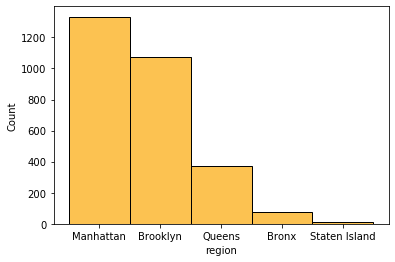

In [20]:
sns.histplot(data['region'],bins = 20,color = "#fcae17")

In [21]:
correlation = data.corr()['yearly_availability']
correlation.abs().sort_values(ascending=False)[1:]

reviews_per_month    0.312213
owned_hotels         0.191906
number_of_reviews    0.191645
minimum_nights       0.173550
id                   0.161629
cost                 0.147576
owner_id             0.121234
longitude            0.119882
latitude             0.025119
Name: yearly_availability, dtype: float64

In [22]:
import matplotlib.pyplot as plt

In [23]:
pip install -U seaborn

Requirement already up-to-date: seaborn in /opt/conda/lib/python3.7/site-packages (0.11.2)
Note: you may need to restart the kernel to use updated packages.


## Finding Relation

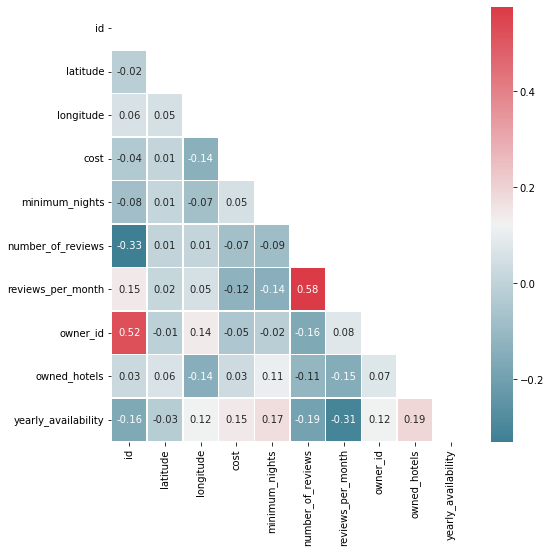

In [24]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(8,8))
colormap = sns.diverging_palette(220,10,as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)]=True
colormap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,cmap=colormap,linewidth=.5,annot=True,fmt=".2f",mask=dropSelf)
plt.show()

We see that columns that have more weight are 'region','accommodation_type','cost','minimum_nights','reviews_per_month','yearly_availability'

## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [30]:
135/2 , 225/30 

(67.5, 7.5)

In [31]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


## Building model

In [32]:
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [33]:
train_data = data.copy()[['region','accommodation_type','cost','minimum_nights','reviews_per_month','yearly_availability']]

In [34]:
train_data.accommodation_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [35]:
x = []
y = []

## Converting Regions to Integers
1 = Manhattan, 2 = Queens, 3 = Brooklyn, 4 = Bronx, 5 = Staten Island

In [36]:
for i in train_data['region']:
    if i == "Manhattan":
        x.append(1)
    if i == "Queens":
        x.append(2)
    if i == "Brooklyn":
        x.append(3)
    if i == "Bronx":
        x.append(4)
    if i == "Staten Island":
        x.append(5)

## Converting Room type to Integers:
1 = "Entire House", 2 = "Private Room", 3 = "Shared Room"

In [37]:
for i in train_data['accommodation_type']:
    if i == 'Entire home/apt':
        y.append(1)
    if i == 'Private room':
        y.append(2)
    if i == 'Shared room':
        y.append(3)

In [38]:
train_data['region'] = x
train_data['accommodation_type'] = y
train_data.head()

,region,accommodation_type,cost,minimum_nights,reviews_per_month,yearly_availability
0,1,1,170,5,0.56,0
1,3,1,65,3,2.30,0
2,2,2,85,1,0.00,1
3,1,2,210,30,0.00,1
4,1,3,75,3,0.42,1


## Splitting Data into training and validation set

In [61]:
x = train_data.copy()[['region','accommodation_type','cost','minimum_nights','reviews_per_month']]
y = train_data['yearly_availability']

In [62]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.2, shuffle = False)

## Fitting model and predicting values

In [63]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
print(lr.coef_)

[[ 0.23913422  0.86818157  0.0025422   0.03917683 -0.41076898]]


In [65]:
print(lr.intercept_)

[-2.55318348]


In [66]:
m = lr.coef_[0][0]
c=lr.intercept_[0]

In [67]:
y_hat = lr.predict(x_val)

In [68]:
coba = x_val.iloc[:1]
lr.predict(coba)
coba

,region,accommodation_type,cost,minimum_nights,reviews_per_month
2296,1,2,200,15,0.14


In [69]:
lr.score(x_train,y_train)

0.7116724738675958

In [70]:
lr.score(x_val,y_val)

0.7299651567944251

## Training accuracy = 71.167%
## Validation Accuracy = 72.996%

In [71]:
confusion_matrix(y_val,y_hat)

array([[217,  69],
       [ 86, 202]])

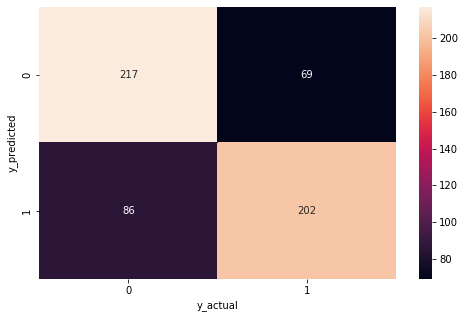

In [72]:
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_val,y_hat),annot=True,fmt='.0f',ax=ax)
plt.xlabel("y_actual")
plt.ylabel("y_predicted")
plt.show()

In [73]:
print(classification_report(y_val,y_hat))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74       286
           1       0.75      0.70      0.72       288

    accuracy                           0.73       574
   macro avg       0.73      0.73      0.73       574
weighted avg       0.73      0.73      0.73       574





**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


In [74]:
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


## Converting Region and Accomodation type in Test data to integer values in train data

In [76]:
m = []
n = []

In [77]:
for i in test_data['region']:
    if i == "Manhattan":
        m.append(1)
    if i == "Queens":
        m.append(2)
    if i == "Brooklyn":
        m.append(3)
    if i == "Bronx":
        m.append(4)
    if i == "Staten Island":
        m.append(5)

In [78]:
for i in test_data['accommodation_type']:
    if i == 'Entire home/apt':
        n.append(1)
    if i == 'Private room':
        n.append(2)
    if i == 'Shared room':
        n.append(3)

In [79]:
test_data['region'] = m
test_data['accommodation_type'] = n
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,3,40.70912,-73.94513,3,135,2,22,0.66,4360212,1
1,36301,3,40.57646,-73.96641,1,69,2,8,0.90,181356989,2
2,40566,1,40.76616,-73.98228,2,225,30,0,NaN,13773574,12
3,33694,1,40.77668,-73.94587,3,125,30,9,0.82,6788748,1
4,28873,1,40.80279,-73.94450,1,43,1,13,0.72,105061915,2


In [80]:
x_test = test_data.copy()[['region','accommodation_type','cost','minimum_nights','reviews_per_month']]

In [81]:
x_test.head()

,region,accommodation_type,cost,minimum_nights,reviews_per_month
0,3,3,135,2,0.66
1,3,1,69,2,0.90
2,1,2,225,30,NaN
3,1,3,125,30,0.82
4,1,1,43,1,0.72


In [82]:
x_train.head()

,region,accommodation_type,cost,minimum_nights,reviews_per_month
0,1,1,170,5,0.56
1,3,1,65,3,2.30
2,2,2,85,1,0.00
3,1,2,210,30,0.00
4,1,3,75,3,0.42


## FIlling Nan Values with 0

In [85]:
x_test['reviews_per_month'] = x_test['reviews_per_month'].fillna(0)

In [87]:
y_test = lr.predict(x_test)

In [93]:
test_data['yearly_availability'] = y_test

In [94]:
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,19215,3,40.70912,-73.94513,3,135,2,22,0.66,4360212,1,1
1,36301,3,40.57646,-73.96641,1,69,2,8,0.90,181356989,2,0
2,40566,1,40.76616,-73.98228,2,225,30,0,NaN,13773574,12,1
3,33694,1,40.77668,-73.94587,3,125,30,9,0.82,6788748,1,1
4,28873,1,40.80279,-73.94450,1,43,1,13,0.72,105061915,2,0


> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [97]:
submission_df = test_data.copy()[['id','yearly_availability']]

In [98]:
submission_df.head()

,id,yearly_availability
0,19215,1
1,36301,0
2,40566,1
3,33694,1
4,28873,0


In [99]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---